# Background 

The deal team wants to understand the gourmet grocery space a bit better, specifically focusing on a handful of companies (Whole Foods, Sprouts, Natural Grocer, Fresh Thyme, Fresh Market, and Earth Fare). You are given access to a geolocation dataset which tracks cell phone pings when customers enter a gourmet grocery store.  Please use this data to answer the following questions and to make a sole recommendation of which grocery store brand is your top pick for an investment (assume all of them have the same revenue, financials, and purchase price).  

Data frequency for the geolocation data is daily from 9/10/2015 to 11/16/2020. The demographics file is a snapshot as of October 2020.  

In [1]:
# Reading the dataset 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('grocers_t2_C01.csv')
df_demo = pd.read_excel('grocers_demographics.xlsx')

In [2]:
df_1 = df.copy()

In [3]:
df_demo

,month,ticker,id_store,income_avg,income_25pct,income_median,income_75pct,age,male,female
0,2020-10-01,SFM,5030442,37064,25265,33719,46037,44.787109,0.436599,0.563401
1,2020-10-01,SFM,889142,59505,40984,55754,73550,37.759814,0.463241,0.536759
2,2020-10-01,SFM,889242,65001,37387,58328,90053,36.301016,0.482081,0.517919
3,2020-10-01,SFM,889125,42291,26460,37851,51927,33.891190,0.450302,0.549698
4,2020-10-01,SFM,4680461,37932,21566,34077,46260,33.254631,0.485182,0.514818
...,...,...,...,...,...,...,...,...,...,...
1259,2020-10-01,AMZN-WFM,5610151,83490,62872,82529,100128,35.440178,0.484241,0.515759
1260,2020-10-01,AMZN-WFM,5610135,110049,39697,91070,157350,39.987188,0.438907,0.561093
1261,2020-10-01,AMZN-WFM,4231281,118957,52813,106803,178519,42.336996,0.397612,0.602388
1262,2020-10-01,AMZN-WFM,4653426,47221,20725,34410,67980,33.767758,0.518059,0.481941


In [4]:
# Checking the datatypes for the cellphone device dataset

df_1.dtypes

day               object
devices_store      int64
devices            int64
traffic          float64
Store Name        object
id                 int64
Address           object
Retailer          object
dtype: object

#### 1a. Reindexing the cellphone device dataset

In [5]:
df_1['day'] = pd.to_datetime(df_1['day'])
df_1.set_index('day', inplace=True)
df_1.head()

,devices_store,devices,traffic,Store Name,id,Address,Retailer
day,,,,,,,
2015-09-10,1,360033,0.000003,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
2015-09-11,1,363897,0.000003,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
2015-10-09,1,499110,0.000002,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
2015-10-14,1,555658,0.000002,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
2015-10-15,1,570636,0.000002,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market


It would be better to take the average of the numerical columns i.e device_store, devices and traffic for each quarter so that these columns are on the same scale. The sum of tracked devices from one day to the next includes those that were being tracked from the previous day and new ones. It would prevent double counting of devices. Aggregation of the dataset will be done as needed for each question based on what information needs to be retrieved.

In [6]:
# df_1 = df_1.resample('QS').mean()
# df_1

#### 1.b Normalizing the traffic column

In [7]:
df_2 = df.copy()
df_2['traffic'] = df_2['traffic']*df_2['devices']
df_2

,day,devices_store,devices,traffic,Store Name,id,Address,Retailer
0,2015-09-10,1,360033,1.0,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
1,2015-09-11,1,363897,1.0,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
2,2015-10-09,1,499110,1.0,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
3,2015-10-14,1,555658,1.0,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
4,2015-10-15,1,570636,1.0,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
...,...,...,...,...,...,...,...,...
2167805,2020-11-12,7,11113173,7.0,Westbury,5610153,"867 East Gate Blvd, Garden City, NY 11530",Whole Foods Market
2167806,2020-11-13,7,11182263,7.0,Westbury,5610153,"867 East Gate Blvd, Garden City, NY 11530",Whole Foods Market
2167807,2020-11-14,20,11163652,20.0,Westbury,5610153,"867 East Gate Blvd, Garden City, NY 11530",Whole Foods Market
2167808,2020-11-15,21,11093217,21.0,Westbury,5610153,"867 East Gate Blvd, Garden City, NY 11530",Whole Foods Market


#### 2 Highest and lowest traffic for each grocer per quarter

In [8]:
df_2['day'] = pd.to_datetime(df_2['day'])
# df_2['traffic per day'] = df_2['devices_store'] / df_2['traffic']
df_2.head()

,day,devices_store,devices,traffic,Store Name,id,Address,Retailer
0,2015-09-10,1,360033,1.0,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
1,2015-09-11,1,363897,1.0,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
2,2015-10-09,1,499110,1.0,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
3,2015-10-14,1,555658,1.0,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
4,2015-10-15,1,570636,1.0,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market


In [9]:
import math
from datetime import datetime, timedelta

def get_quarter(d):
    return "Q%d_%d" % (math.ceil(d.month/3), d.year)

In [10]:
df_2['Quarter'] = df_2['day'].apply(get_quarter)

In [42]:
# d = df_2.groupby(['Retailer','Store Name','Quarter']).mean().sort_values('traffic', ascending=False).reset_index()

In [43]:
# d

In [13]:
df_2['Retailer'].value_counts()

Whole Foods Market        882182
Sprouts Farmers Market    605958
Freshmarket               283695
naturalgrocer             258315
Freshthyme                115560
EARTHFARE                  22100
Name: Retailer, dtype: int64

In [14]:
# df_2[df_2['Retailer']=='Whole Foods Market']['Store Name'].value_counts()

In [15]:
# df_2[df_2['Retailer']=='Whole Foods Market'].groupby('Quarter').min()

In [16]:
# Highest traffic per grocer

d = df_2.groupby(['Retailer','Quarter']).max().reset_index()

In [47]:
# df_2.groupby(['Retailer','Quarter']).mean().sort_values('traffic', ascending=False).reset_index()

In [17]:
d[['Retailer','Quarter','Store Name', 'traffic','devices_store']]

,Retailer,Quarter,Store Name,traffic,devices_store
0,EARTHFARE,Q1_2016,"Williamsburg, VA",16.0,16
1,EARTHFARE,Q1_2017,"Williamsburg, VA",20.0,20
2,EARTHFARE,Q1_2018,"Williamsburg, VA",43.0,43
3,EARTHFARE,Q1_2019,"Williamsburg, VA",63.0,63
4,EARTHFARE,Q1_2020,"Williamsburg, VA",81.0,81
...,...,...,...,...,...
127,naturalgrocer,Q4_2016,Wyoming,124.0,124
128,naturalgrocer,Q4_2017,Wyoming,95.0,95
129,naturalgrocer,Q4_2018,Wyoming,191.0,191
130,naturalgrocer,Q4_2019,Wyoming,302.0,302


In [18]:
# Lowest traffic per grocer

f = df_2.groupby(['Retailer','Quarter']).min().reset_index()

In [19]:
f[['Retailer','Quarter','Store Name', 'traffic', 'devices_store']]

,Retailer,Quarter,Store Name,traffic,devices_store
0,EARTHFARE,Q1_2016,"Asheville, NC",1.0,1
1,EARTHFARE,Q1_2017,"Asheville, NC",1.0,1
2,EARTHFARE,Q1_2018,"Asheville, NC",1.0,1
3,EARTHFARE,Q1_2019,"Asheville, NC",3.0,3
4,EARTHFARE,Q1_2020,"Asheville, NC",1.0,1
...,...,...,...,...,...
127,naturalgrocer,Q4_2016,Arizona,1.0,1
128,naturalgrocer,Q4_2017,Arizona,1.0,1
129,naturalgrocer,Q4_2018,Arizona,1.0,1
130,naturalgrocer,Q4_2019,Arizona,1.0,1


#### 3. Highest year over year growth  1Q2017 vs. 1Q2016

In [49]:
d = df_2.groupby(['Retailer', 'Store Name','Quarter']).sum().reset_index().sort_values('traffic', ascending=True)
d[(d['Quarter']=='Q1_2016')|(d['Quarter']=='Q1_2017')].sort_values('Quarter')[['Retailer', 'Store Name', 'traffic']]

,Retailer,Store Name,traffic
5309,Sprouts Farmers Market,Albuquerque - Lomas Blvd. (Store #702),504.0
19191,Whole Foods Market,Monterey,423.0
12290,Sprouts Farmers Market,Tucson - 1st Ave. (Store #23),422.0
132,EARTHFARE,"Greenville, SC",421.0
14880,Whole Foods Market,Cherry Creek,1040.0
...,...,...,...
21844,Whole Foods Market,South End,484.0
20924,Whole Foods Market,River Street,483.0
7500,Sprouts Farmers Market,Franklin (Store #580),482.0
21779,Whole Foods Market,Sonoma,481.0


#### 4. Rebound in terms of traffic

In [21]:
f = df.copy()
f['day'] = pd.to_datetime(f['day'])
f.set_index('day', inplace=True)
f.head()

,devices_store,devices,traffic,Store Name,id,Address,Retailer
day,,,,,,,
2015-09-10,1,360033,0.000003,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
2015-09-11,1,363897,0.000003,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
2015-10-09,1,499110,0.000002,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
2015-10-14,1,555658,0.000002,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
2015-10-15,1,570636,0.000002,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market


In [22]:
f = f.loc['2020-04-30':]
f.head()

,devices_store,devices,traffic,Store Name,id,Address,Retailer
day,,,,,,,
2020-04-30,6,10754029,5.579304e-07,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
2020-05-01,4,10753176,3.719831e-07,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
2020-05-02,5,10773827,4.640876e-07,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
2020-05-03,4,10773754,3.712726e-07,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market
2020-05-04,6,10808523,5.551175e-07,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market


<AxesSubplot:xlabel='day'>

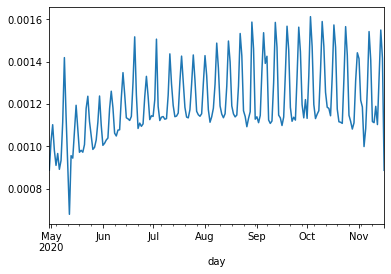

In [23]:
f[f['Retailer']=='Whole Foods Market'].reset_index().groupby('day').sum()['traffic'].plot.line()

<AxesSubplot:xlabel='day'>

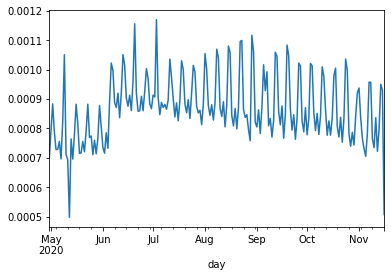

In [24]:
f[f['Retailer']=='Sprouts Farmers Market'].groupby('day').sum()['traffic'].plot.line()

<AxesSubplot:xlabel='day'>

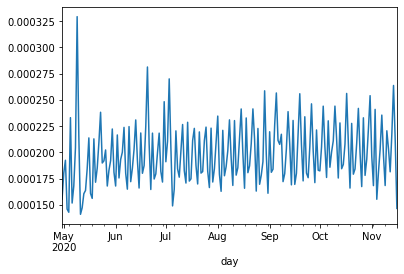

In [25]:
f[f['Retailer']=='Freshmarket'].groupby('day').sum()['traffic'].plot.line()

<AxesSubplot:xlabel='day'>

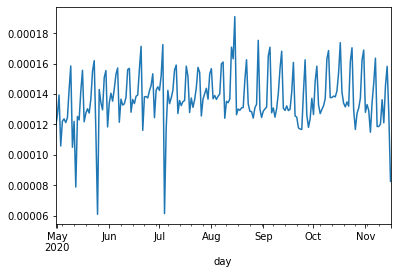

In [26]:
f[f['Retailer']=='naturalgrocer'].groupby('day').sum()['traffic'].plot.line()

<AxesSubplot:xlabel='day'>

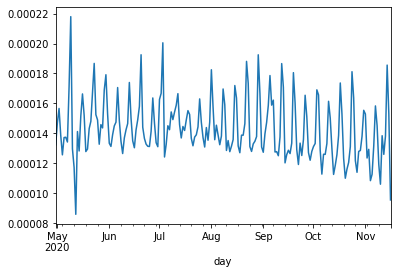

In [27]:
f[f['Retailer']=='Freshthyme'].groupby('day').sum()['traffic'].plot.line()

<AxesSubplot:xlabel='day'>

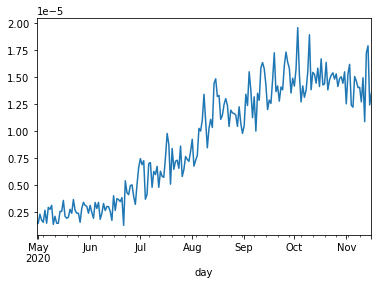

In [28]:
f[f['Retailer']=='EARTHFARE'].groupby('day').sum()['traffic'].plot.line()

#### 5. Stores per state for each grocer

In [29]:
dg = df.copy()

In [30]:
df_2.head()

,day,devices_store,devices,traffic,Store Name,id,Address,Retailer,Quarter
0,2015-09-10,1,360033,1.0,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market,Q3_2015
1,2015-09-11,1,363897,1.0,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market,Q3_2015
2,2015-10-09,1,499110,1.0,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market,Q4_2015
3,2015-10-14,1,555658,1.0,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market,Q4_2015
4,2015-10-15,1,570636,1.0,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market,Q4_2015


In [31]:
df_2['State'] = df_2['Address'].apply(lambda x: x.split(',')[2].split(' ')[1].strip())

In [32]:
# dg['State'].value_counts()

In [33]:
df_2.groupby(['Retailer', 'State']).count().reset_index()[['Retailer','State','Store Name']]

,Retailer,State,Store Name
0,EARTHFARE,FL,1741
1,EARTHFARE,GA,1804
2,EARTHFARE,MI,1759
3,EARTHFARE,NC,5261
4,EARTHFARE,Roc,1845
...,...,...,...
164,naturalgrocer,OR,21733
165,naturalgrocer,TX,37770
166,naturalgrocer,UT,12198
167,naturalgrocer,WA,6661


#### 6. Highest growth by state for each grocer from 4Q2019 to 4Q2020

In [55]:
# By Number of stores

df_2[(df_2['Quarter']=='Q4_2019') | (df_2['Quarter']=='Q4_2020')].groupby(['Retailer', 'State']).count().sort_values('Store Name',ascending=False).reset_index()[['Retailer','State','Store Name']].sort_values('Retailer')

,Retailer,State,Store Name
112,EARTHFARE,MI,139
127,EARTHFARE,FL,138
93,EARTHFARE,VA,278
71,EARTHFARE,SC,553
124,EARTHFARE,GA,139
...,...,...,...
115,naturalgrocer,Littleton,139
22,naturalgrocer,OR,1905
26,naturalgrocer,AZ,1631
91,naturalgrocer,AR,413


In [54]:
# Average number of visits to a store

df_2[(df_2['Quarter']=='Q4_2019') | (df_2['Quarter']=='Q4_2020')].groupby(['Retailer', 'State']).mean().sort_values('devices_store',ascending=False).reset_index()[['Retailer','State','devices_store']].sort_values('Retailer')

,Retailer,State,devices_store
112,EARTHFARE,SC,15.115732
104,EARTHFARE,VA,16.428058
32,EARTHFARE,FL,35.282609
106,EARTHFARE,Roc,15.546763
111,EARTHFARE,NC,15.141827
...,...,...,...
128,naturalgrocer,NV,11.966019
127,naturalgrocer,ND,12.118644
120,naturalgrocer,AR,13.140436
153,naturalgrocer,IA,7.755800


#### 7. State with highest average income and youngest average visitor

In [36]:
df_merge = pd.merge(df_2, df_demo, left_on='id', right_on='id_store')

In [37]:
df_merge.head()

,day,devices_store,devices,traffic,Store Name,id,Address,Retailer,Quarter,State,month,ticker,id_store,income_avg,income_25pct,income_median,income_75pct,age,male,female
0,2015-09-10,1,360033,1.0,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market,Q3_2015,SC,2020-10-01,AMZN-WFM,4653406,47733,31919,43825,55544,37.283244,0.464006,0.535994
1,2015-09-11,1,363897,1.0,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market,Q3_2015,SC,2020-10-01,AMZN-WFM,4653406,47733,31919,43825,55544,37.283244,0.464006,0.535994
2,2015-10-09,1,499110,1.0,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market,Q4_2015,SC,2020-10-01,AMZN-WFM,4653406,47733,31919,43825,55544,37.283244,0.464006,0.535994
3,2015-10-14,1,555658,1.0,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market,Q4_2015,SC,2020-10-01,AMZN-WFM,4653406,47733,31919,43825,55544,37.283244,0.464006,0.535994
4,2015-10-15,1,570636,1.0,West Ashley,4653406,"1125 Savannah Hwy, Charleston, SC 29407",Whole Foods Market,Q4_2015,SC,2020-10-01,AMZN-WFM,4653406,47733,31919,43825,55544,37.283244,0.464006,0.535994


In [38]:
# Highest average income per grocer by state

df_merge.groupby(['Retailer', 'State']).mean().reset_index().sort_values('income_avg', ascending=False)[['Retailer', 'State', 'income_avg']]

,Retailer,State,income_avg
12,Freshmarket,CT,102176.427912
59,Freshmarket,Wilmette,91010.000000
106,Whole Foods Market,CT,90814.179108
131,Whole Foods Market,NY,87035.006805
40,Freshmarket,NJ,86549.928058
...,...,...,...
46,Freshmarket,Panama,34576.000000
29,Freshmarket,Johnson,33859.000000
0,EARTHFARE,FL,31534.000000
158,naturalgrocer,Montrose,30672.000000


In [39]:
# Youngest average visitor age per grocer by state

df_merge.groupby(['Retailer', 'State']).mean().reset_index().sort_values('age', ascending=True)[['Retailer', 'State', 'age']]

,Retailer,State,age
154,naturalgrocer,Logan,25.996589
98,Sprouts Farmers Market,UT,29.874341
166,naturalgrocer,UT,31.687250
1,EARTHFARE,GA,32.153053
56,Freshmarket,Tuscaloosa,32.640812
...,...,...,...
59,Freshmarket,Wilmette,43.529879
34,Freshmarket,MA,43.755156
19,Freshmarket,FL,44.548728
0,EARTHFARE,FL,46.673095


8. Based on how a grocer rebounded after the pandemic in terms of traffic, average growth rate of stores and store visits, and the number of visits recorded by a grocer before the pandemic which indicates its potential under normal business conditions compared to other grocers, I would recommend the EARTHFARE grocers for investment.   